# Midterm (MACS 30100), February 5, 2018
### John-Henry Pezzuto
You will have an hour and thirty minutes to take this exam.
1. Put your name in the space provided above (without the brackets).
2. Download this notebook and accompanying data `LenderDataLong.dta`.
3. The class will disconnect their wi-fi and begin taking the exam.
4. The exam is open computer, closed internet, open note.
5. Once you are done, you will signal to a TA or instructor to come over and monitor while you reconnect to the internet and upload your edited notebook to Canvas.

Remember that you must clearly indicate your answers to all questions below. We will give partial credit for partially correct answers. The midterm is worth 20 points (2 problem sets).

## The data
This two exercises of this midterm and all their respective subparts will use the `LenderData.csv` dataset, which contains observations of characteristics on short-term, high interest rate, lender information. You are not to use this data outside of this class. It is a jittered and randomized version of a dataset used in a published research paper.

Each observation contains characteristics of a particular lender location Read it into Python using the `pandas.read_csv()` command. The variables are the following:

* `avgrate`: average annualized interest rate of all loans in percentage points (235 = two hundred and thirty five percent)
* `numstores`: number of other stores owned by the same owner (measure of size)
* `defrate`: default rate on loans from that store during 2010
* `pdrad3`: number of payday lenders within a three-mile radius of the store (measure of competition)
* `pnrad3`: number of pawn lenders within a three-mile radius of the store (measure of competition)
* `totrad3`: total number of other lenders within a three-mile radius of the store (measure of competition)
* `unrt_zip`: unemployment rate in the zip code of the store
* `medtotinc2010`: median total household income in the zip code of the store
* `edbachplus_zip`: average education level in years of schooling of heads of household in the zip code of the store
* `pop_zip`: population in zip code of the store
* `mdage_zip`: median age (in years) in zip code of the store
* `pctblk2_zip`: percent of the population that is black in the zip code of the store in percentage points (2.2=two point two percent)

In [118]:
#packages
import numpy as np
import scipy.optimize as opt
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import scipy.integrate as intgr
import numpy.linalg as lin
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
from pandas import Series, DataFrame


#logistic regression packages
import sklearn as sk
from sklearn import preprocessing
from sklearn import datasets, neighbors, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pylab import rcParams
import seaborn as sb



plt.style.use("ggplot")
%matplotlib inline

#data
LenderData = pd.read_csv("LenderData.csv")




## 1. Using the distributions of interest rates and median income (10 points)

1A) [2 points] Create a plot of the histogram of high interest rate lenders interest rates `avgrate`. Use 30 bins. Make sure to label your axes and give the figure a title. If you had to group lenders into $N$ categories, how many categories would you choose based on the interest rate data? That is, how many groupings to you see in these data?

In [120]:
#LenderData['medtotinc2010'].head(200)

1A) It looks like there are 3 distinct groupings in the data


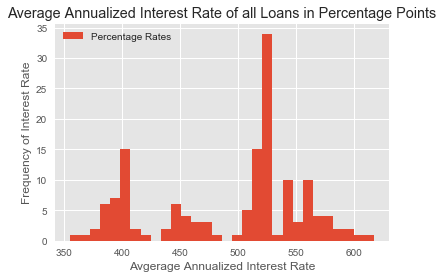

In [121]:
plt.hist(LenderData['avgrate'], bins = 30, label = 'Percentage Rates') # real data
plt.title("Average Annualized Interest Rate of all Loans in Percentage Points")
plt.xlabel("Avgerage Annualized Interest Rate")
plt.ylabel("Frequency of Interest Rate")
plt.legend(loc = 'upper left')

print("1A) It looks like there are 3 distinct groupings in the data")

1B) [1 point] Create a plot of the histogram of median total household income `medtotinc2010`. Use 30 bins. Make sure to label your axes and give the figure a title.

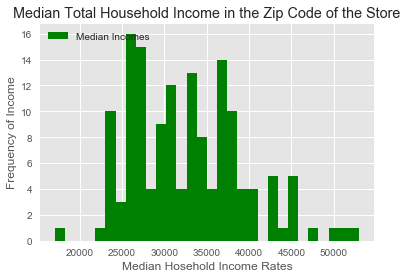

In [122]:
plt.hist(LenderData['medtotinc2010'], bins = 30, color = 'g', label = 'Median Incomes') # real data
plt.title("Median Total Household Income in the Zip Code of the Store")
plt.xlabel("Median Hosehold Income Rates")
plt.ylabel("Frequency of Income")
plt.legend(loc = 'upper left')

1C) [5 points] Use maximum likelihood estimation to fit a lognormal distribution $LN(\mu, \sigma)$ to the median income data `medtotinc2010`. Report your estimated $\hat{\mu}_{mle}$ and $\hat{\sigma}_{mle}$ as well as the likelihood function value at the maximum (not the negative log likelihood). Report your estimate of the variance-covariance matrix of your maximum likelihood estimates of $\hat{\mu}_{mle}$ and $\hat{\sigma}_{mle}$. Report the standard error on the estimate for $\hat{\mu}_{mle}$.

In [128]:
inc_sim = np.linspace(0.1, 60000, 800)

In [129]:
#initial guesses
sig_init = 5000
mu_init = 32000
params_init = [mu_init,sig_init]

#mle args
mle_args = (LenderData['medtotinc2010'], 'None') # real data, cutoff

#lognormal functions
def log_norm_pdf(xvals, mu, sigma, cutoff):## log normal dist w/ truncated
    if cutoff == 'None':
        prob_notcut = 1.0
    else:
        prob_notcut = sts.lognorm.cdf(cutoff, s=sigma, loc=mu, scale=np.exp(mu)) # use lognormal CDF function
            
    log_pdf_vals = (((1/(xvals * sigma * np.sqrt(2 * np.pi))) *
                    np.exp( - ((np.log(xvals)) - mu)**2 / (2 * sigma**2))) / 
                    prob_notcut)
    return log_pdf_vals 

def log_lik_norm(xvals, mu, sigma, cutoff): ## log liklihood for lognormal
    pdf_vals = log_norm_pdf(xvals, mu, sigma, cutoff) #this is the line that makes it lognormal 
    ln_pdf_vals = np.log(pdf_vals) 
    log_lik_val = ln_pdf_vals.sum() 
   
    return log_lik_val 


def crit(params, *args): ## criterion function. neg of logliklihood
    mu, sigma = params 
    xvals, cutoff = args
    log_lik_val = log_lik_norm(xvals, mu, sigma, cutoff) 
    neg_log_lik_val = log_lik_val
    
    return neg_log_lik_val

def log(x,mu,sigma):  ##log norm pdf w/o truncated
    temp = -pow((np.log(x)-mu),2)/2/pow(sigma,2)
    y = 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(temp)
    return y



mu_MLE= 32000.1880835  sig_MLE= 4998.82566044 

The Value of Liklihood Function is: -6112.23294441742
VCV(MLE) =
 [[ 1. -0.]
 [-0.  1.]] 

Standard error for mu estimate =  1.0
Standard error for sigma estimate =  1.0


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/anaconda/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


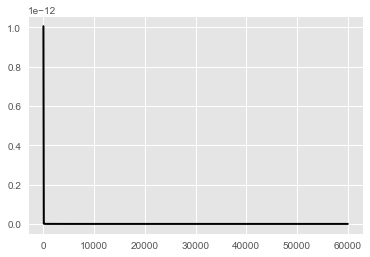

In [130]:
# Estimate Parameters

# run minimizer to get MLE estimates
results1 = opt.minimize(crit, params_init, args=(mle_args), bounds=((None, None),(0.1, None)), method= 'L-BFGS-B')# sigma needs be postive in PDF function.
mu_MLE1, sig_MLE1 = results1.x # get the estimated parameters
print('mu_MLE=', mu_MLE1, ' sig_MLE=', sig_MLE1, '\n')


#get logliklihood value
loglik1 = log_lik_norm(LenderData['medtotinc2010'], mu_1, sig_1, 'None')
print("The Value of Liklihood Function is:", loglik1)

#VCV
OffDiagNeg = np.array([[1, -1], [-1, 1]]) # this has purpose of making some numbers neg //
vcv_mle = results1.hess_inv.todense() * OffDiagNeg
stderr_mu_mle1 = np.sqrt(vcv_mle[0,0]) # square rooted cause log
stderr_sig_mle1 = np.sqrt(vcv_mle[1,1]) #square rooted cause log
print('VCV(MLE) =\n', vcv_mle, '\n')
print('Standard error for mu estimate = ', stderr_mu_mle1)
print('Standard error for sigma estimate = ', stderr_sig_mle1)

#Plot Line
plt.plot(inc_sim, log_norm_pdf(inc_sim, mu_MLE1, sig_MLE1, 'None'), linewidth=2, color='k', label='2: $\mu$=mu_MLE1,$\sigma$=sig_MLE1') # plot PDF with parameters estimated by MLE

1D) [2 points] Plot the predicted distribution from your maximum likelihood estimates $\hat{\mu}_{mle}$ and $\hat{\sigma}_{mle}$ against the histogram of the data.

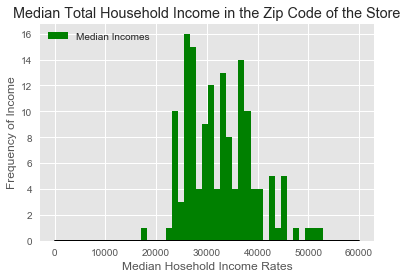

In [131]:
plt.hist(LenderData['medtotinc2010'], bins = 30, color = 'g', label = 'Median Incomes') # real data
plt.title("Median Total Household Income in the Zip Code of the Store")
plt.xlabel("Median Hosehold Income Rates")
plt.ylabel("Frequency of Income")
plt.legend(loc = 'upper left')


#Plot Line
plt.plot(inc_sim, log_norm_pdf(inc_sim, mu_MLE1, sig_MLE1, 'None'), linewidth=2, color='k', label='2: $\mu$=mu_MLE1,$\sigma$=sig_MLE1') # plot PDF with parameters estimated by MLE

^ I couldn't make this graph look correct. However, the logic for *making the graph* is correct !

## 2. Determinants of lender interest rates (10 points)

2A) [3 points] Assume a simple regression model of four factors that influence the interest rates that a lender charges, namely, number of stores, default rate in the area, unemployment rate in the area, and median household income in the area.

$$ avgrate_i = \beta_0 + \beta_1 numstores_i + \beta_2 defrate_i + \beta_3 unrt_zip_i + \beta_4 medtotinc2010_i + u_i $$

Estimate this model by OLS using the `statsmodels.api` package. Don't forget to include a constant. Print your results summary. Which variables are significant at the 5-percent level? How would you interpret in words the estimated coefficient on `numstores`?

In [112]:
LenderData['const']=1
reg1 = sm.OLS(endog=LenderData['avgrate'], exog=LenderData[['const', 'numstores' ,'defrate','unrt_zip','medtotinc2010']], missing='drop')

type(reg1)
results = reg1.fit()
type(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                avgrate   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.375
Date:                Mon, 05 Feb 2018   Prob (F-statistic):            0.00229
Time:                        12:53:28   Log-Likelihood:                -812.28
No. Observations:                 147   AIC:                             1635.
Df Residuals:                     142   BIC:                             1650.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           453.4117     51.263      8.845

In [114]:
print('2a number of stores is significant at a .05 level. A 1 unit increase in number of stores will result in a -2.678 drop in loan percentage points')

2b number of stores is significant at a .05 level. A 1 unit increase in number of stores will result in a -2.678 drop in loan percentage points


2B) [4 points] Now assume a richer model for the determinants of lender interest rates, which includes the following measures of competition and other demographic variables.

$$ avgrate_i = \beta_0 + \beta_1 numstores_i + \beta_2 defrate_i + \beta_3 unrt_zip_i + \beta_4 medtotinc2010_i + ... $$
$$ \qquad\qquad\qquad\qquad \beta_5 totrad3_i + \beta_6 edbachplus\_zip_i + \beta_7 pop\_zip_i + \beta_8 mdage\_zip_i + \beta_9 pctblk2\_zip_i + u_i $$

Estimate this regression by OLS using the `statsmodels.api` package. In controlling for these new varaibles, do any of the originally estimated coefficients from the model in part (2A) become statistically not significant (at the 5 percent level)? Of these new coefficients ($\beta_5$ through $\beta_9$), which one(s) are the most statistically significant?

In [111]:
reg2 = sm.OLS(endog=LenderData['avgrate'], exog=LenderData[['const', 'numstores' ,'defrate','unrt_zip','medtotinc2010','totrad3',
                                                                        'edbachplus_zip', 'pop_zip', 'mdage_zip', 'pctblk2_zip']], missing='drop')
reg2_sm = reg2.fit()
reg2_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avgrate   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     2.846
Date:                Mon, 05 Feb 2018   Prob (F-statistic):            0.00419
Time:                        12:53:24   Log-Likelihood:                -808.23
No. Observations:                 147   AIC:                             1636.
Df Residuals:                     137   BIC:                             1666.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            613.9741     85.491      7.182      0.000     444.921     783.027
numstores         -2.4303      0.680     -3.574      0.000      -3.775      -1.086
defrate            0.8094      0.585      1.384      0.168      -0.347       1.966
unrt_zip          -0.3055      3.521     -0.087      0.931      -7.268       6.657
medtotinc2010      0.0010      0.001      0.843      0.401      -0.001       0.003
totrad3           -0.6991      0.527     -1.326      0.187      -1.741       0.343
edbachplus_zip    -1.3219      0.660     -2.004      0.047      -2.626      -0.018
pop_zip           -0.0006      0.000     -1.539      0.126      -0.001       0.000
mdage_zip         -1.8352      2.234     -0.821      0.413      -6.253       2.583
pctblk2_zip        2.3541      5.981      0.394      0.694      -9.473      14.181
==============================================================================
Omnibus:                        2.316   Durbin-Watson:                   0.443
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                2.014
Skew:                          -0.174   Prob(JB):                        0.365
Kurtosis:                       2.543   Cond. No.                     8.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
print('2b) None of the previously significant variables become insignificant. Of the new variables, edbachplus_zip is the most significant')

2b) None of the previously significant variables become insignificant. Of the new variables, edbachplus_zip is the most significant


2C) [3 points] Create a new binary variable called `avgrate_high` that equals 1 if `avgrate` > 490, and equals 0 otherwise. Estimate a logistic regression using the `statsmodels.api` package. Let $X\beta$ be the linear coefficients and variables from the model from part (2B).

$$ Pr(avgrate\_high=1|X\beta) = \frac{X\beta}{1 + X\beta} $$

Report the variables whose coefficients are estimated to be significant at the 5-percent level.

In [100]:
LenderData['avgrate_high'] = LenderData['avgrate'].apply(lambda x: 1 if x > 425 else 0) #conditional to add 1 and 0s
LogitModel = sm.Logit(endog=LenderData['avgrate_high'], exog=LenderData[['const', 'numstores' ,'defrate','unrt_zip','medtotinc2010',
                                                                        'edbachplus_zip', 'pop_zip', 'mdage_zip', 'pctblk2_zip']], missing='drop')

LogitReg_sm = LogitModel.fit()
LogitReg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.324112
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           avgrate_high   No. Observations:                  147
Model:                          Logit   Df Residuals:                      138
Method:                           MLE   Df Model:                            8
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:                  0.4095
Time:                        12:46:14   Log-Likelihood:                -47.644
converged:                       True   LL-Null:                       -80.685
                                        LLR p-value:                 2.950e-11
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.2300      4.933      1.668      0.095      -1.439      17.899
numstores         -0.2449      0.045     -5.415      0.000      -0.334      -0.156
defrate            0.0926      0.036      2.605      0.009       0.023       0.162
unrt_zip           0.1181      0.185      0.638      0.523      -0.245       0.481
medtotinc2010   9.697e-05   6.21e-05      1.561      0.118   -2.48e-05       0.000
edbachplus_zip    -0.0641      0.038     -1.702      0.089      -0.138       0.010
pop_zip        -1.274e-05   2.29e-05     -0.555      0.579   -5.77e-05    3.22e-05
mdage_zip         -0.1863      0.120     -1.551      0.121      -0.422       0.049
pctblk2_zip        0.0651      0.296      0.220      0.826      -0.514       0.644
==================================================================================
"""

In [101]:
print('2C) numstores, defrate, are significant at the 5% level')

2C) numstores, defrate, are significant at the 5% level
